# 3. Data Preparation

In this phase we will prepare the dataset, modifying it according to the previous phase. In the end of this notebook we should have a dataset ready to be used in modelling.

## 3.1 Select Data

We begin by loading the complete raw data so that we have more flexibility in the preparation of the data.

The selection of the most relevant variables will be done in the next steps.

In [12]:
import pandas as pd

student = pd.read_csv("../../../databases/2022/STU_QQQ_SAS/student2022.csv")

# 3.2 Clean Data

From the previous phase, we decided to remove unnecessary variables according the following criteria:
- Variables with more than 70% missing values.
- Students from England, due to differences in their education system.

In [13]:
missing = student.isnull().mean().sort_values(ascending=False)
filtered_students = student.drop(columns=missing[missing > 0.7].index)

filtered_students = filtered_students[(filtered_students["CNT"] != "b'GBR'")]

filtered_students.head(5)

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
0,b'ALB',8.0,800282.0,800001.0,b'08MS',b'000800',b'ALB03',b'0080000',800.0,0.0,...,226.250,203.029,219.817,331.017,223.752,305.671,230.156,289.436,0.55561,b'03MAY23:10:11:25'
1,b'ALB',8.0,800115.0,800002.0,b'08MS',b'000800',b'ALB03',b'0080000',800.0,0.0,...,298.644,321.405,320.452,284.836,364.565,304.044,347.626,352.269,0.76431,b'03MAY23:10:11:25'
2,b'ALB',8.0,800242.0,800003.0,b'08MS',b'000800',b'ALB01',b'0080000',800.0,0.0,...,383.340,376.019,285.901,289.896,338.469,316.296,324.361,343.351,1.37877,b'03MAY23:10:11:25'
3,b'ALB',8.0,800245.0,800005.0,b'08MS',b'000800',b'ALB08',b'0080000',800.0,0.0,...,264.532,303.422,327.793,165.575,246.156,238.322,275.860,227.466,1.49361,b'03MAY23:10:11:26'
4,b'ALB',8.0,800285.0,800006.0,b'08MS',b'000800',b'ALB03',b'0080000',800.0,0.0,...,399.300,514.739,539.850,461.793,514.465,510.462,490.537,503.793,0.65249,b'03MAY23:10:11:26'


# 3.3 Format Data

In this step, we construct new variables based on the available data.

For each subject, there are 10 plausible values (PVs), which we averaged into a single score column per subject.

In [14]:
from columns_list import (
    math_subscales,
    math_columns,
    science_columns,
    reading_columns,
    get_math_results,
    get_science_results,
    get_reading_results,
)

def remove_columns(dataframe, column_list):
    new_df = dataframe.copy()
    new_df = new_df.drop(columns=column_list)

    return new_df

def get_student_results(dataframe, math_columns, science_columns, reading_columns):
    new_df = dataframe.copy()
    new_df = get_math_results(new_df, math_columns)
    new_df = get_science_results(new_df, science_columns)
    new_df = get_reading_results(new_df, reading_columns)

    return new_df

In [15]:
student_filtered = get_student_results(student, math_columns, science_columns, reading_columns)

We'll also remove mathematic subscales as they are already captured by the aggregated Math Result score.

In [16]:
student_filtered = remove_columns(student_filtered, math_subscales)

In [17]:
student_filtered.head(5)

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,W_FSTURWT78,W_FSTURWT79,W_FSTURWT80,UNIT,WVARSTRR,SENWT,VER_DAT,Avg Math Result,Avg Science Result,Avg Reading Result
0,b'ALB',8.0,800282.0,800001.0,b'08MS',b'000800',b'ALB03',b'0080000',800.0,0.0,...,1.59631,1.58021,4.70887,1.0,50.0,0.55561,b'03MAY23:10:11:25',223.0351,301.2603,249.8026
1,b'ALB',8.0,800115.0,800002.0,b'08MS',b'000800',b'ALB03',b'0080000',800.0,0.0,...,2.12833,2.16631,6.40402,1.0,41.0,0.76431,b'03MAY23:10:11:25',308.4938,303.5314,288.8999
2,b'ALB',8.0,800242.0,800003.0,b'08MS',b'000800',b'ALB01',b'0080000',800.0,0.0,...,11.86015,11.79079,3.96558,1.0,19.0,1.37877,b'03MAY23:10:11:25',313.7353,323.6492,311.7785
3,b'ALB',8.0,800245.0,800005.0,b'08MS',b'000800',b'ALB08',b'0080000',800.0,0.0,...,13.51571,4.53800,4.41017,1.0,38.0,1.49361,b'03MAY23:10:11:26',298.7323,210.1502,300.7753
4,b'ALB',8.0,800285.0,800006.0,b'08MS',b'000800',b'ALB03',b'0080000',800.0,0.0,...,5.55627,5.78305,5.80990,1.0,56.0,0.65249,b'03MAY23:10:11:26',475.7512,466.7572,486.6689


# corr

In [18]:
repeating_students = student_filtered[student_filtered["REPEAT"] == 1]
non_repeating_students = student_filtered[student_filtered["REPEAT"] == 0]


repeating_correlations = repeating_students.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)

repeating_correlations = repeating_correlations.drop("Avg Math Result")

non_repeating_correlations = non_repeating_students.corr(numeric_only=True)[
    "Avg Math Result"
].sort_values(ascending=False)

non_repeating_correlations = non_repeating_correlations.drop("Avg Math Result")

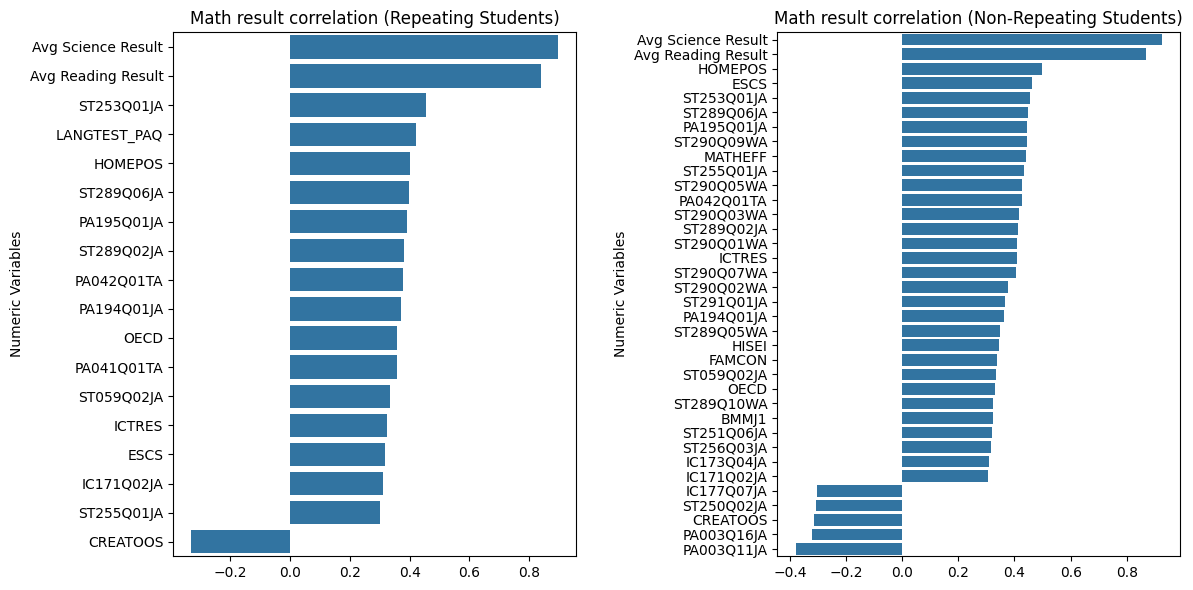

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

repeating_correlations = repeating_correlations[repeating_correlations.abs() > 0.3]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

sns.barplot(x=repeating_correlations.values, y=repeating_correlations.index)
plt.title("Math result correlation (Repeating Students)")
plt.ylabel("Numeric Variables")

plt.subplot(1, 2, 2)

non_repeating_correlations = non_repeating_correlations[
    non_repeating_correlations.abs() > 0.3
]
sns.barplot(x=non_repeating_correlations.values, y=non_repeating_correlations.index)
plt.title("Math result correlation (Non-Repeating Students)")
plt.ylabel("Numeric Variables")

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

In [23]:
categorical = repeating_students.select_dtypes(include=["object", "category"]).columns
categorical

Index(['CNT', 'CYC', 'NatCen', 'STRATUM', 'SUBNATIO', 'ST250D06JA',
       'ST250D07JA', 'ST251D08JA', 'ST251D09JA', 'ST330D10WA', 'OCOD1',
       'OCOD2', 'OCOD3', 'PROGN', 'COBN_S', 'COBN_M', 'COBN_F', 'VER_DAT'],
      dtype='object')